# import du lieu

In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras

# THEM DU LIEU TU KERAS

In [13]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [14]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [15]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [16]:
#  xem du lieu
import matplotlib.pyplot as plt
from PIL import Image

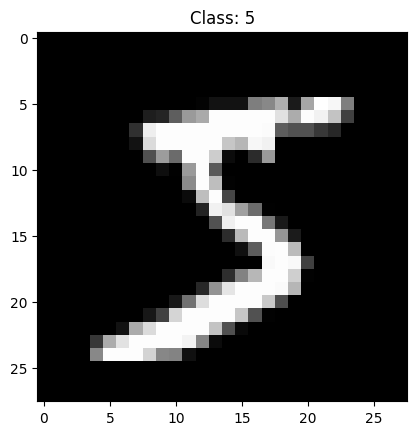

In [17]:
img = Image.fromarray(X_train[0])
plt.imshow(img, cmap='gray')
plt.title(f"Class: {y_train[0]}")
plt.show()


# BIEN DOI DU LIEU

In [18]:
# 0 ... 125 -> 0 ... 1
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

- `n` số hình (60000)
- `w` chiều rộng (26)
- `h` chiều cao (28)
- `d` direction (vì hình trắng den nên chọn d = 1, hình có mau RGB thì d = 3)

In [19]:
# them chieu direction
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)
X_train.shape, X_test.shape


((60000, 28, 28, 1), (10000, 28, 28, 1))

- `n` số hình (60000)
- `Class` số lớp 



In [20]:
my_classes = 10  #từ 0 -> 10
y_train = keras.utils.to_categorical(y_train, my_classes)
y_test = keras.utils.to_categorical(y_test, my_classes)


# HUYEN LUYEN MO 

In [21]:
input_shape = (28, 28, 1)  # height, width, channels
model = keras.Sequential([
    keras.layers.Conv2D(32, kernel_size=(3, 3), input_shape=input_shape),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.Conv2D(64, kernel_size=(3, 3)),# them 1 layer de hoc nhieu hon
     keras.layers.MaxPooling2D(pool_size=(2, 2)),
     keras.layers.Flatten(),
    keras.layers.Dense(my_classes, activation='softmax') #phan loai class
])

model.compile(optimizer="adam",loss= "categorical_crossentropy",metrics=["accuracy"])
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

In [22]:
#  huan luyen
batch_size = 128 #so luong mau trong 1 lan cap nhat
epochs = 5  # so lan lap qua toan bo du lieu
validation_split = 0.1  # tach 10% tu tap trian thanh tap validation
model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=validation_split)

Epoch 1/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 26s 59ms/step - accuracy: 0.9161 - loss: 0.2958 - val_accuracy: 0.9760 - val_loss: 0.0895
Epoch 2/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 28s 66ms/step - accuracy: 0.9750 - loss: 0.0848 - val_accuracy: 0.9827 - val_loss: 0.0657
Epoch 3/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 28s 66ms/step - accuracy: 0.9804 - loss: 0.0632 - val_accuracy: 0.9853 - val_loss: 0.0567
Epoch 4/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 31s 74ms/step - accuracy: 0.9838 - loss: 0.0524 - val_accuracy: 0.9858 - val_loss: 0.0524
Epoch 5/5
422/422 ━━━━━━━━━━━━━━━━━━━━ 29s 69ms/step - accuracy: 0.9861 - loss: 0.0454 - val_accuracy: 0.9852 - val_loss: 0.0550


# DANH GIA MO HINH

In [23]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}") #ham mat mat tren tap kiem tra
print(f"Test accuracy: {accuracy}") #do chinh xac tren tap kiem tra

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9821 - loss: 0.0555
Test loss: 0.05547953397035599
Test accuracy: 0.9821000099182129


# DU DOAN

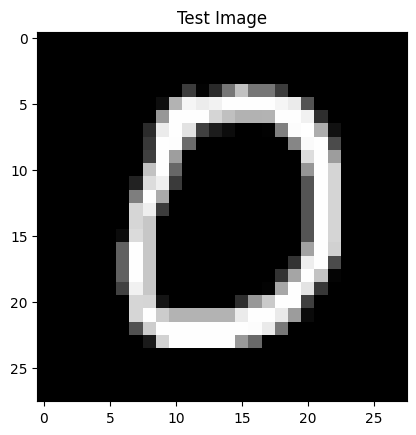

In [27]:
test_img = X_test[10]
img = Image.fromarray((test_img.squeeze() * 255).astype(np.uint8))
plt.imshow(img, cmap='gray')
plt.title("Test Image")
plt.show()


Vì layer Dense ở cuối có 10 units nên kết quả của `predict` cũng trả về một numpy array có 10 giá trị, mỗi giá trị là tỉ lệ mà hình thuộc lớp tương ứng.
> Ví dụ: Mô hình phân loại 4 lớp có kết quả predict là `[0.1, 0.2, 0.7, 0.0]` nghĩa là hình có 10% thuộc lớp thứ nhất, 20% thuộc lớp thứ hai, 70% thuộc lớp thứ ba và 0% thuộc lớp cuối cùng.

> Lưu ý: Tổng tất cả các tỉ lệ của mảng kết quả luôn bằng 1, tương ứng với 100%.

In [34]:
test_img = np.expand_dims(test_img, 0)  # them kich thuoc batch
pred = model.predict(test_img)
preds

ValueError: Exception encountered when calling Sequential.call().

[1mCannot take the length of shape with unknown rank.[0m

Arguments received by Sequential.call():
  • inputs=tf.Tensor(shape=<unknown>, dtype=float32)
  • training=False
  • mask=None
  • kwargs=<class 'inspect._empty'>

In [32]:
test_pred = np.argmax(preds)
print(f"Predicted class = {test_pred}")


NameError: name 'preds' is not defined